In [1]:
import pandas as pd

In [2]:
from meteoch.retrieve import retrieve

In [3]:
granularity = 'hourly'

In [4]:
url1 = "https://ensemble-api.open-meteo.com/v1/ensemble?latitude=47.479611&longitude=8.535961&hourly=pressure_msl&past_days=1&forecast_days=5&models=icon_seamless"
url2 = "https://ensemble-api.open-meteo.com/v1/ensemble?latitude=46.0007&longitude=8.909778&hourly=pressure_msl&past_days=1&forecast_days=5&models=icon_seamless"

In [5]:
# retrieve data from open-meteo.com
data1 = retrieve(url1, granularity)
data2 = retrieve(url2, granularity)

In [6]:
data1.set_index('time', inplace=True)
data2.set_index('time', inplace=True)

In [7]:
diff = data1 - data2

In [8]:
model_no = diff.columns

<Axes: xlabel='time'>

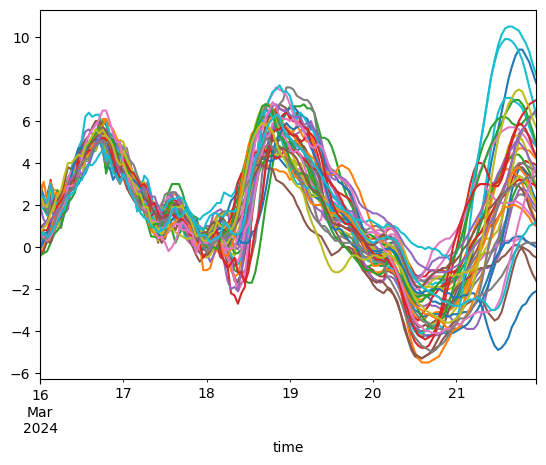

In [9]:
diff.plot(y=model_no, use_index=True, legend = False)

In [10]:
median = diff.median(axis=1)

<Axes: xlabel='time'>

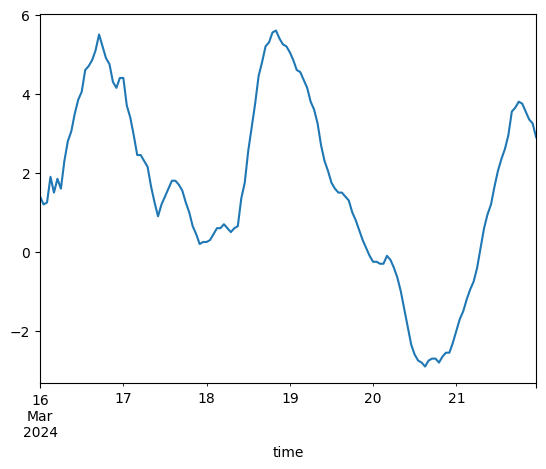

In [11]:
median.plot(y=model_no, use_index=True, legend = False)

In [12]:
std = diff.std(axis=1)

<Axes: xlabel='time'>

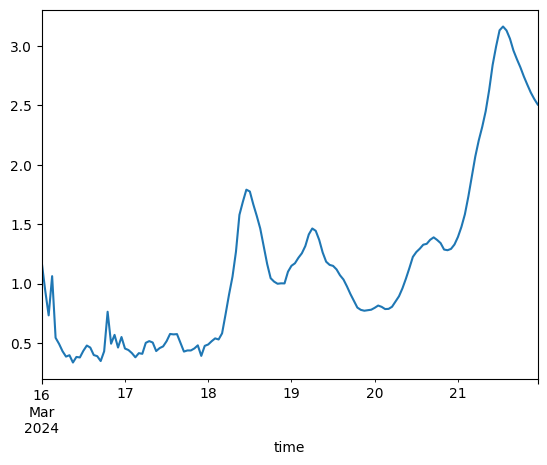

In [13]:
std.plot(y=model_no, use_index=True, legend = False)

In [14]:
q10 = pd.DataFrame({'Q10':diff.quantile(0.10, axis=1)})
q25 = pd.DataFrame({'Q25':diff.quantile(0.25, axis=1)})
q50 = pd.DataFrame({'Q50':diff.quantile(0.50, axis=1)})
q75 = pd.DataFrame({'Q75':diff.quantile(0.75, axis=1)})
q90 = pd.DataFrame({'Q90':diff.quantile(0.90, axis=1)})

In [17]:
quantiles = pd.concat([q10,q25,q50,q75,q90], axis=1, join='inner')

<Axes: xlabel='time'>

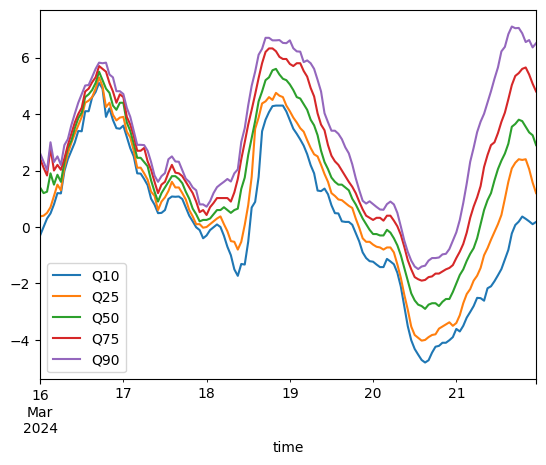

In [18]:
quantiles.plot(y=['Q10','Q25','Q50','Q75','Q90'], use_index=True)

In [23]:
quantiles

,Q10,Q25,Q50,Q75,Q90
time,,,,,
2024-03-16 00:00:00,-0.3,0.375,1.4,2.425,2.61
2024-03-16 01:00:00,0.0,0.4,1.2,2.1,2.31
2024-03-16 02:00:00,0.3,0.5,1.25,1.825,2.01
2024-03-16 03:00:00,0.48,0.7,1.9,2.8,3.0
2024-03-16 04:00:00,0.8,1.1,1.5,2.0,2.3
...,...,...,...,...,...
2024-03-21 19:00:00,0.37,2.375,3.75,5.6,6.86
2024-03-21 20:00:00,0.29,2.4,3.55,5.65,6.55
2024-03-21 21:00:00,0.2,2.05,3.35,5.4,6.62


In [22]:
x = quantiles.to_series()
x

AttributeError: 'DataFrame' object has no attribute 'to_series'

In [ ]:
quantiles = diff.quantile([0.10, 0.25, 0.50,0.75,0.90], axis=1, method='single')